## TASK 2 - CREDIT CARD FRAUD DETECTION

This project aims to detect fraudulent credit card transactions using various machine learning algorithms. The notebook includes steps for data preprocessing, model training, evaluation, and comparison of different anomaly detection models.

<h1>Import the required libraries</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope,MinCovDet
from sklearn.svm import OneClassSVM

<h1>Dataset Analysis & Preprocessing</h1>

In [4]:
data = pd.read_csv('../datasets/creditcard/creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
# Checking the missing values 
print(data.isnull().sum())

data.shape

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


(284806, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0, 0.5, 'Frequency')

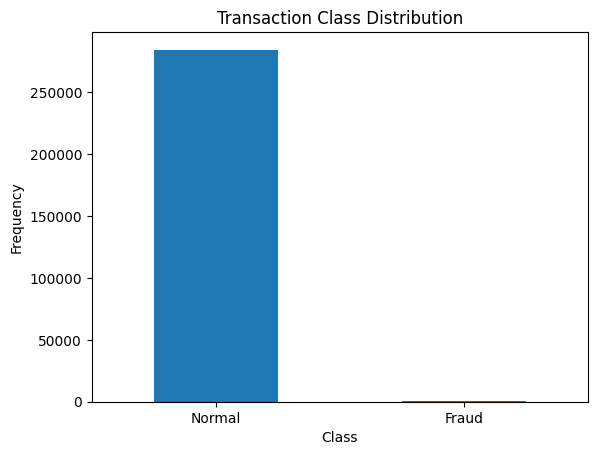

In [6]:
# Determine the number of fraud and valid transactions in the entire dataset
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
#Assigning the transaction class "0 = NORMAL  & 1 = FRAUD"
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

print(f"Number of Normal transaction: {Normal.shape[0]}")
print(f"Numbre of Fraud transaction: {Fraud.shape[0]}")

Number of Normal transaction: 284314
Numbre of Fraud transaction: 492


<h5>How different are the amount of money used in different transaction classes?</h5>

In [8]:
print(Normal.Amount.describe())
print("----------xxxxxxxxxx----------")
print(Fraud.Amount.describe())

count    284314.000000
mean         88.290570
std         250.105416
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
----------xxxxxxxxxx----------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


<h5>Let's have a more graphical representation of the data<h5>

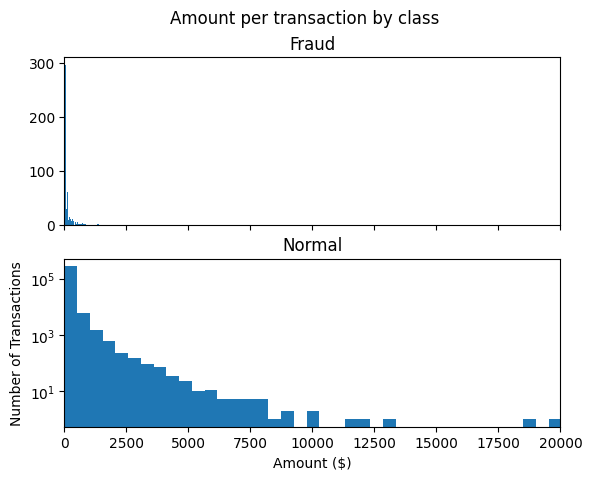

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

<h5>Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.</h5>

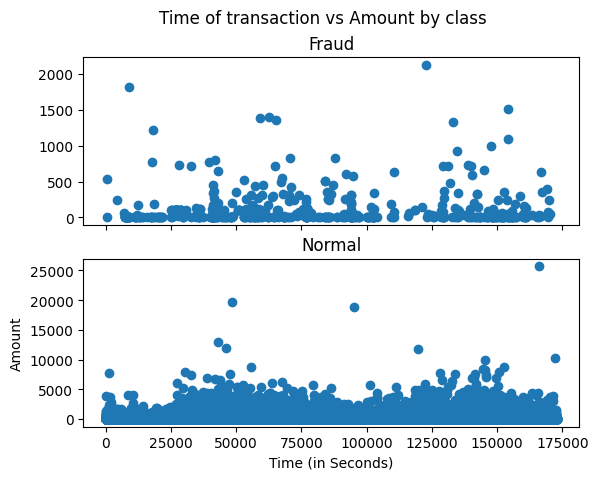

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


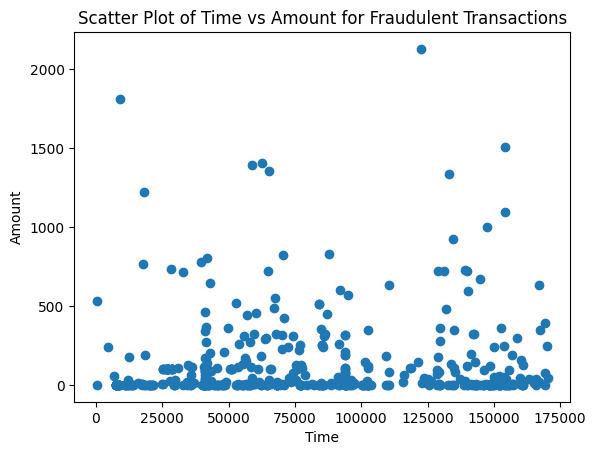

In [11]:
# Create scatter plot
plt.scatter(Fraud['Time'], Fraud['Amount'], marker='o')

# Set plot title and labels
plt.title('Scatter Plot of Time vs Amount for Fraudulent Transactions')
plt.xlabel('Time')
plt.ylabel('Amount')

# Show the plot
plt.show()

Doesn't seem like the time of transaction really matters here as per above observation. Now let us take a sample of the dataset for out modelling and prediction

In [12]:
#Determine the number of fraud and valid transactions in the dataset.
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
#Now let us print the outlier fraction and no of Fraud and Valid Transaction cases
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017304810878113635
Fraud Cases : 492
Valid Cases : 284314


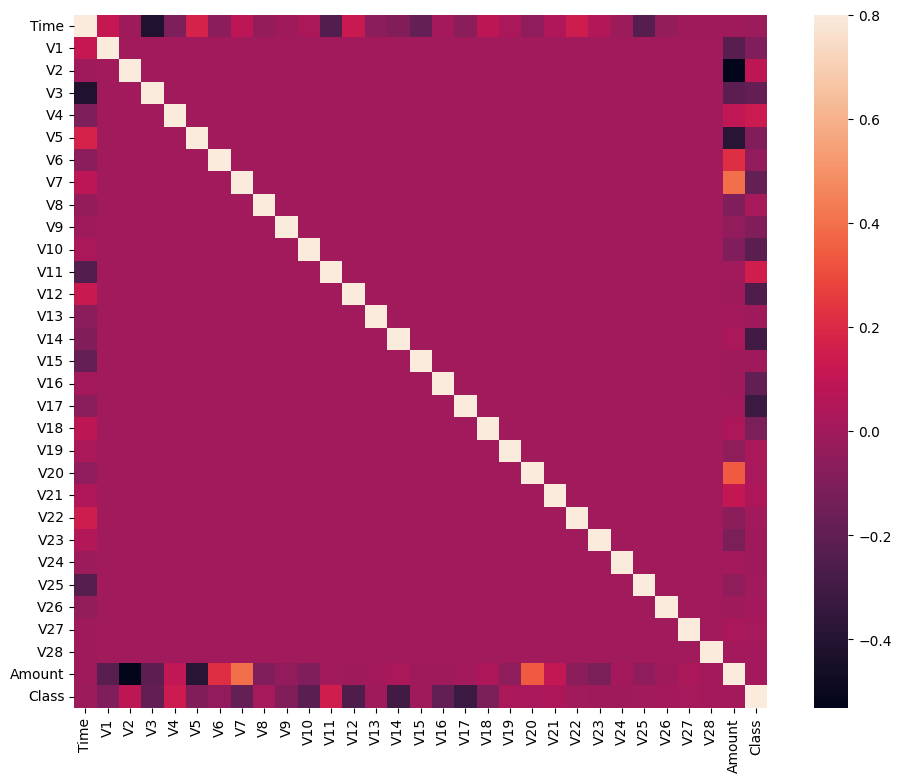

In [13]:
#Correlation Matrix

correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

This heatmap visualization displays the correlation matrix of a dataset with various features, typically used in the context of machine learning or statistical analysis. Here’s an explanation of what the heatmap represents:

<h3>Next Steps</h3>

<b>Model Building:</b> Use the insights gained from the correlation analysis to build more effective predictive models, particularly focusing on features with strong relationships to the target variable.

<h3>Conclusion</h3>
This heatmap provides a visual summary of the relationships between features in the dataset. The above correlation matrix shows that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

In [14]:
#Get all the columns from the dataframe
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284806, 30)
(284806,)


<h1>Model Prediction</h1>

In [17]:
# Suppress the ConvergenceWarning from scikit-learn
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

`Isolation Forest` is an outlier detection algorithm that works by isolating observations in a dataset by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This process is repeated recursively to build an ensemble of isolation trees. Outliers are identified as instances that require fewer splits to be isolated, thus having shorter average path lengths in the trees.

The `Local Outlier Factor` method is a popular algorithm for outlier detection. It calculates the local density deviation of a data point with respect to its neighbors. By comparing the local density of a data point to the local densities of its neighbors, the algorithm can identify outliers as data points with significantly lower density compared to their neighbors. This method is effective in detecting outliers in datasets where the outliers have lower density compared to the rest of the data points.

The `Support Vector Machine` method is being used for outlier detection in this context. It is implemented using the `OneClassSVM` class.

The `Minimum Covariance Determinant` method is a robust estimator for multivariate data that fits a Gaussian distribution to the data by finding the subset of observations with the minimum covariance determinant. This method is useful for detecting outliers in the data by identifying observations that deviate significantly from the estimated Gaussian distribution. It is particularly effective in scenarios where the data may contain outliers or follow a non-Gaussian distribution.

The `K Nearest Neighbors` method is creating a classifier using the k-nearest neighbors algorithm. This algorithm is a type of instance-based learning or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. In this case, the classifier is using the `NearestNeighbors` class with `n_neighbors=5` to find the 5 nearest neighbors for each data point.

In [26]:
# Define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X), 
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='linear', degree=3, gamma='auto', nu=0.05, max_iter=10000),
    "Minimum Covariance Determinant": MinCovDet(support_fraction=1 - outlier_fraction),
    "K Nearest Neighbors": NearestNeighbors(n_neighbors=5, algorithm='auto')
}

In [33]:
#Fit the model
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_scaled)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_scaled[:150000])
        y_pred = clf.predict(X_scaled)
    elif clf_name == "Minimum Covariance Determinant":
        clf.fit(X_scaled)
        # Compute Mahalanobis distances
        mahalanobis_distances = clf.mahalanobis(X_scaled)
        # Threshold for outliers based on Chi-squared distribution
        threshold = np.percentile(mahalanobis_distances, 100 * (1 - outlier_fraction))
        y_pred = (mahalanobis_distances > threshold).astype(int)
    elif clf_name == "K Nearest Neighbors":
        clf.fit(X_scaled, Y)
        # Compute distances to the nearest neighbors
        distances, _ = clf.kneighbors(X_scaled)
        # Compute the mean distance to the k-nearest neighbors for each point
        mean_distances = distances.mean(axis=1)
        # Threshold for outliers based on percentile
        threshold = np.percentile(mean_distances, 100 * (1 - outlier_fraction))
        y_pred = (mean_distances > threshold).astype(int)
    else:    
        clf.fit(X_scaled)
        scores_prediction = clf.decision_function(X_scaled)
        y_pred = clf.predict(X_scaled)
    
    # Reshape the prediction values to 0 for valid transactions and 1 for fraud transactions
    y_pred_reshaped = np.where(y_pred == 1, 0, 1)
    
    # Calculate the number of errors
    n_errors = (y_pred_reshaped != Y).sum()
    
    # Run classification metrics
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred_reshaped))
    print("Classification Report:")
    print(classification_report(Y, y_pred_reshaped))

Isolation Forest: 667
Accuracy Score:
0.9976580549567073
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284314
           1       0.32      0.32      0.32       492

    accuracy                           1.00    284806
   macro avg       0.66      0.66      0.66    284806
weighted avg       1.00      1.00      1.00    284806

Local Outlier Factor: 985
Accuracy Score:
0.9965415054458122
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284314
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284806
   macro avg       0.50      0.50      0.50    284806
weighted avg       1.00      1.00      1.00    284806

Support Vector Machine: 140412
Accuracy Score:
0.5069907235100384
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.51     

<h1>Conclusion:</h1> 

While Isolation Forest had the highest accuracy, its precision, recall, and F1-score for anomalies were not
satisfactory. SVM showed the highest recall but had extremely low precision. MCD, KNN, and LOF all
performed poorly, failing to detect any fraudulent cases effectively.

The choice of model depends on the specific requirements of the anomaly detection task,such asthe balance
between precision and recall, computational efficiency, and the nature of the dataset. In this case, further
experimentation with feature engineering, model tuning, or even ensemble methods might be necessary to
improve performanc